In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df = pd.concat([train, test], sort=False, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [5]:
df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True, errors='ignore')
df.Embarked.fillna(df.Embarked.mode()[0], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S


In [6]:
df.replace(['male', 'female'], [0, 1], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,0,22.0,1,0,7.2500,S
1,1.0,1,1,38.0,1,0,71.2833,C
2,1.0,3,1,26.0,0,0,7.9250,S
3,1.0,1,1,35.0,1,0,53.1000,S
4,0.0,3,0,35.0,0,0,8.0500,S


In [7]:
df = pd.concat([df, pd.get_dummies(df.Embarked, drop_first=True)], sort=False, axis=1)
df.drop(['Embarked'], axis=1, inplace=True, errors='ignore')
df.Age.fillna(train.Age.mean(), inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0.0,3,0,22.000000,1,0,7.2500,0,1
1,1.0,1,1,38.000000,1,0,71.2833,0,0
2,1.0,3,1,26.000000,0,0,7.9250,0,1
3,1.0,1,1,35.000000,1,0,53.1000,0,1
4,0.0,3,0,35.000000,0,0,8.0500,0,1
5,0.0,3,0,29.699118,0,0,8.4583,1,0
6,0.0,1,0,54.000000,0,0,51.8625,0,1
7,0.0,3,0,2.000000,3,1,21.0750,0,1
8,1.0,3,1,27.000000,0,2,11.1333,0,1
9,1.0,2,1,14.000000,1,0,30.0708,0,0


In [8]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
count,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000,1309.000000,1309.000000
mean,0.383838,2.294882,0.355997,29.844567,0.498854,0.385027,33.295479,0.093965,0.699771
std,0.486592,0.837836,0.478997,12.883400,1.041658,0.865560,51.758668,0.291891,0.458533
min,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,1.000000,1.000000


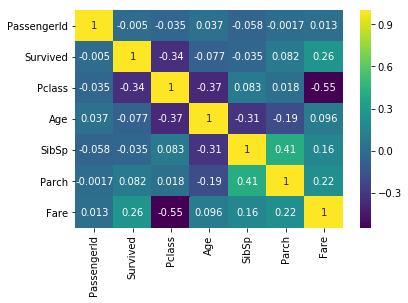

In [9]:
sns.heatmap(train.corr(), cmap='viridis', annot=True)
plt.show()

In [10]:
X = df.iloc[:891, 1:]
y = df.iloc[:891, 0]
data_to_send = df.iloc[891:, 1:]
data_to_send

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
891,3,0,34.500000,0,0,7.8292,1,0
892,3,1,47.000000,1,0,7.0000,0,1
893,2,0,62.000000,0,0,9.6875,1,0
894,3,0,27.000000,0,0,8.6625,0,1
895,3,1,22.000000,1,1,12.2875,0,1
896,3,0,14.000000,0,0,9.2250,0,1
897,3,1,30.000000,0,0,7.6292,1,0
898,2,0,26.000000,1,1,29.0000,0,1
899,3,1,18.000000,0,0,7.2292,0,0
900,3,0,21.000000,2,0,24.1500,0,1


In [11]:
def normalize(col):
    return (col - col.min()) / (col.max() - col.min())

cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
X.loc[:, cols] = normalize(X[cols])
test.loc[:, cols] = normalize(test[cols])
data_to_send.loc[:, cols] = normalize(data_to_send[cols])
data_to_send

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
891,1.0,0,0.452723,0.000,0.000000,0.015282,1,0
892,1.0,1,0.617566,0.125,0.000000,0.013663,0,1
893,0.5,0,0.815377,0.000,0.000000,0.018909,1,0
894,1.0,0,0.353818,0.000,0.000000,0.016908,0,1
895,1.0,1,0.287881,0.125,0.111111,0.023984,0,1
896,1.0,0,0.182382,0.000,0.000000,0.018006,0,1
897,1.0,1,0.393380,0.000,0.000000,0.014891,1,0
898,0.5,0,0.340630,0.125,0.111111,0.056604,0,1
899,1.0,1,0.235131,0.000,0.000000,0.014110,0,0
900,1.0,0,0.274693,0.250,0.000000,0.047138,0,1


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2)

/home/vano/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/vano/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [13]:
xgb_raw = xgb.XGBClassifier()
xgb_raw.fit(X_train, y_train)
print(accuracy_score(y_test, xgb_raw.predict(X_test)))

0.8435754189944135


In [14]:
CV_model = GridSearchCV(estimator=xgb.XGBClassifier(),
                        param_grid={'n_estimators' : np.array(np.linspace(5, 17, 13), dtype=int),
                                    'max_depth' : np.array(np.linspace(8, 25, 18), dtype=int),
                                    'learning_rate' : np.linspace(0.1, 0.9, 5),
                                    'reg_lambda' : np.linspace(0, 0.3, 4)},
                        cv=5,
                        scoring='f1',
                        n_jobs=-1)
CV_model.fit(X_train, y_train)
model = CV_model.best_estimator_
print(accuracy_score(y_test, model.predict(X_test)))
full_prediction = CV_model.fit(X, y)
full_prediction = CV_model.best_estimator_
preds = np.array(full_prediction.predict(data_to_send), dtype=int)

/home/vano/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8603351955307262


In [15]:
df = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived' : preds}, index=None)
df.set_index('PassengerId', inplace=True)
df.to_csv(r'/home/vano/file.csv')